<a href="https://colab.research.google.com/github/Trilochna/Neural-Network/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [59]:
len(X_train)

60000

In [60]:
len(X_test)

10000

In [61]:
X_train[0].shape

(28, 28)

In [62]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

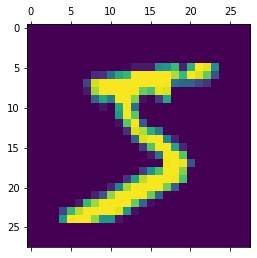

In [63]:
plt.matshow(X_train[0])

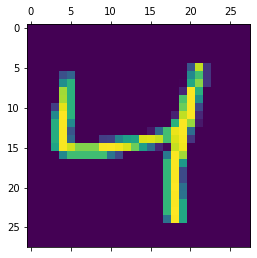

In [64]:
plt.matshow(X_train[2])

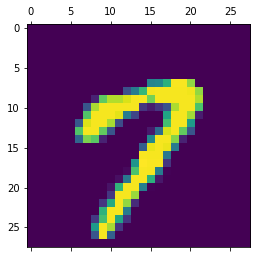

In [65]:
plt.matshow(X_train[15])

In [66]:
y_train[15]

7

In [67]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [68]:
y_train[3:5]

array([1, 9], dtype=uint8)

In [69]:
X_train = X_train / 255
X_test = X_test / 255

In [70]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [71]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
X_train_flattened.shape

(60000, 784)

In [73]:
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
X_test_flattened.shape

(10000, 784)

In [75]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4739 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9256


In [76]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 933us/step - loss: 0.2655 - accuracy: 0.9264


[0.2654578983783722, 0.9264000058174133]

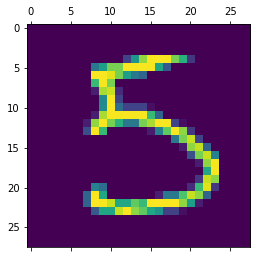

In [77]:
plt.matshow(X_test[15])

In [78]:
y_predicted = model.predict(X_test_flattened)
y_predicted[15]

313/313 [==============================] - 0s 866us/step


array([3.0241145e-02, 8.2265871e-04, 1.3492766e-02, 6.7726213e-01,
       2.9265124e-03, 9.7252470e-01, 2.4532359e-03, 5.0457438e-05,
       6.6700369e-01, 1.6165506e-04], dtype=float32)

In [79]:
np.argmax(y_predicted[15])

5

In [80]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [81]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [82]:
a = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
a

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  928,   14,   10,    5,   11,   11,   35,    4],
       [   4,    0,   20,  924,    0,   24,    3,   11,   16,    8],
       [   1,    1,    3,    1,  922,    0,   11,    3,   10,   30],
       [   9,    3,    3,   32,   11,  774,   18,    6,   29,    7],
       [  10,    3,    7,    1,    8,   10,  915,    2,    2,    0],
       [   1,    5,   23,    4,    9,    0,    0,  956,    3,   27],
       [   6,    7,    6,   22,    9,   28,   10,   14,  867,    5],
       [  10,    7,    2,   11,   31,    8,    0,   30,    4,  906]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

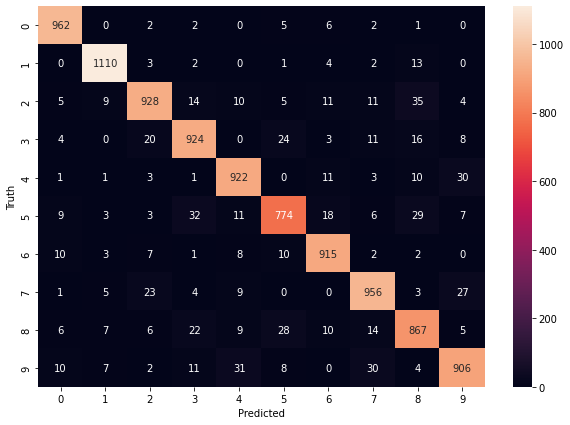

In [83]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(a, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')